In [3]:
!pip install tabula-py
print ('tabula-py installed')

    100% |████████████████████████████████| 20.4MB 1.6MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
tabula-py installed


In [4]:
!conda install -c conda-forge folium=0.5.0 --yes
print ('folium installed')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

In [7]:
!conda install -c conda-forge geopy --yes
print ('geopy installed')

Solving environment: done

# All requested packages already installed.

geopy installed


In [8]:
!pip install matplotlib

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [9]:
!pip install -U scikit-learn

    100% |████████████████████████████████| 6.6MB 5.3MB/s eta 0:00:01
    100% |████████████████████████████████| 286kB 37.9MB/s ta 0:00:01
Requirement not upgraded as not directly required: scipy>=0.17.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from scikit-learn) (1.0.0)
Requirement not upgraded as not directly required: numpy>=1.11.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from scikit-learn) (1.13.3)
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1


In [15]:
import tabula
from tabula import read_pdf
from tabula import convert_into

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt



#import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


##### Download files from COS (Data Assest) to be read in the codes

In [11]:
# The code was removed by Watson Studio for sharing.

### Get New Jersey Homeless data, first by the County. The Data can be downloaded as a PDF file from https://monarchhousing.org/endinghomelessness/njcounts/. 

In [12]:
%%script bash
ls -l

total 0


In [13]:
download_file_cos(credentials,"2018PITReportStatewide.pdf","2018PITReportStatewide.pdf")

File Downloaded


In [16]:
df_NJ_homeless = tabula.read_pdf("2018PITReportStatewide.pdf", encoding='latin-1',spreadsheet=True, header=False, pages='10' )
print ('NJ homeless read')

NJ homeless read


In [18]:
df_NJ_homeless

,Figure i. Number of Counted Homeless Persons by County and Percentage of State Total,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,County,Total\rHomeless\rPersons,% of Total\rHomeless\rPersons,Chronic\rHomeless\rPersons,% of\rChronic\rHomeless\rPersons,Unsheltered\rHomeless\rPersons,% of\rUnsheltered\rHomeless\rPersons
1,Atlantic,437,5%,105,8%,131,8%
2,Bergen,354,4%,11,1%,23,1%
3,Burlington,840,9%,81,6%,56,3%
4,Camden,577,6%,100,8%,84,5%
5,Cape May,103,1%,13,1%,8,0%
6,Cumberland,156,2%,25,2%,35,2%
7,Essex,"2,229",24%,250,19%,396,24%
8,Gloucester,144,2%,8,1%,18,1%
9,Hudson,860,9%,226,17%,243,15%


Clean up df_NJ_homeless (.i.e rename, and drop columns that are not needed for this analysis) 

In [19]:
df_NJ_homeless.drop([df_NJ_homeless.index[0]], inplace = True)
df_NJ_homeless.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], 1, inplace = True)
df_NJ_homeless.rename(columns = {'Figure i. Number of Counted Homeless Persons by County and Percentage of State Total' : 'County', 'Unnamed: 1' : 'Homeless Persons', 'Unnamed: 2' : 'Percentage'}, inplace = True)
df_NJ_homeless['Homeless Persons'] = df_NJ_homeless['Homeless Persons'].str.replace(',', '')
df_NJ_homeless['Homeless Persons'] = pd.to_numeric(df_NJ_homeless['Homeless Persons'])
df_NJ_homeless

,County,Homeless Persons,Percentage
1,Atlantic,437,5%
2,Bergen,354,4%
3,Burlington,840,9%
4,Camden,577,6%
5,Cape May,103,1%
6,Cumberland,156,2%
7,Essex,2229,24%
8,Gloucester,144,2%
9,Hudson,860,9%
10,Hunterdon,169,2%


##### Display and determine the county with the highest homeless person. 

In [20]:
df_NJ_homeless.drop([df_NJ_homeless.index[21]], inplace = True)
df_NJ_homeless.drop(['Percentage'], 1, inplace = True)
df_NJ_homeless.set_index('County', inplace=True)
df_NJ_homeless_proj = df_NJ_homeless.nlargest(1, ['Homeless Persons'])
df_NJ_homeless_proj

,Homeless Persons
County,
Essex,2229


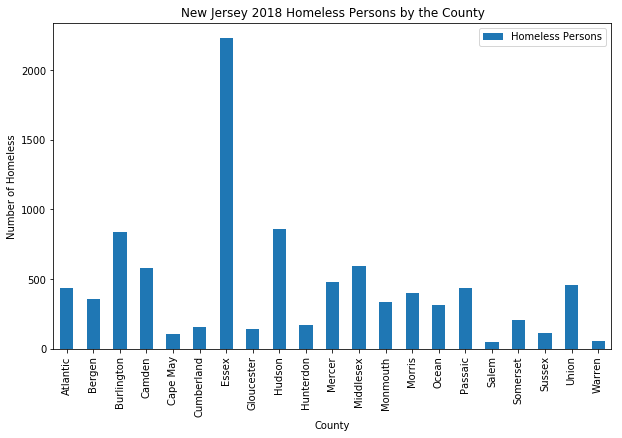

In [21]:
df_NJ_homeless.plot(kind='bar', figsize=(10, 6))

plt.xlabel('County') # add to x-label to the plot
plt.ylabel('Number of Homeless') # add y-label to the plot
plt.title('New Jersey 2018 Homeless Persons by the County') # add title to the plot

plt.show()

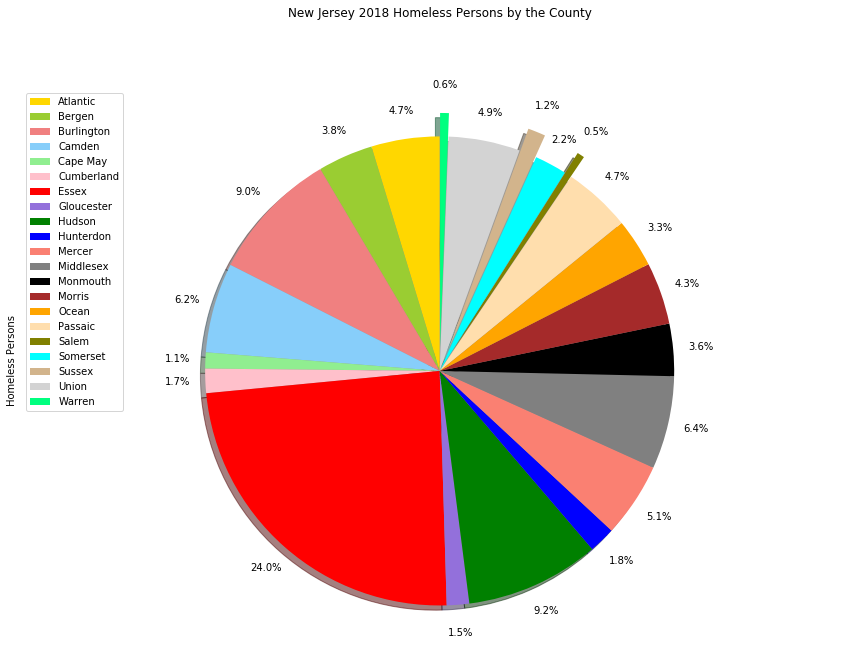

In [22]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen',
               'pink','red', 'mediumpurple', 'green','blue',
               'salmon', 'grey', 'black', 'brown','orange',
               'navajowhite', 'olive', 'cyan', 'tan', 'lightgray',
                'springgreen']
explode_list = [0, 0, 0, 0, 0,
                0, 0, 0, 0, 0,
                0, 0, 0, 0, 0,
                0, 0.1, 0, 0.1, 0,
                0.1] 

df_NJ_homeless['Homeless Persons'].plot(kind='pie',
                            figsize=(15, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            pctdistance=1.12,   
                            colors=colors_list,
                            explode=explode_list
                            )

# scale the title up by 12% to match pctdistance
plt.title('New Jersey 2018 Homeless Persons by the County', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_NJ_homeless.index, loc='upper left') 

plt.show()

##### From the chart you can see the Essex County has the most homeless person.

#### Since the proposal is to setup a food bank, its recommended to do a pilot project on the county that has the most  homeless people, in this case it's Essex county. The data for Essex County homeless persons can be downloded https://cdn.monarchhousing.org/wp-content/uploads/njcounts18/2018PITReportEssex.pdf 

In [23]:
download_file_cos(credentials,"2018PITReportEssex.pdf","2018PITReportEssex.pdf")

File Downloaded


In [24]:
df_Essex_homeless = tabula.read_pdf("2018PITReportEssex.pdf", encoding='latin-1',spreadsheet=True, header=False, pages='9' )
print ('Essex data read')

Essex data read


In [25]:
df_Essex_homeless

,Figure i. Number of Homeless Persons by Municipality and Percentage of County Total,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Municipality,Total\rHomeless\rPersons,%of Total\rHomeless\rPersons,Sheltered\rHomeless\rPersons,%of\rSheltered\rHomeless\rPersons,Unsheltered\rHomeless\rPersons,%of\rUnsheltered\rHomeless\rPersons
1,Belleville,2,0%,0,0%,2,1%
2,Bloomfield,8,0%,0,0%,8,2%
3,City of Orange,18,1%,12,1%,6,2%
4,East Orange,95,4%,71,4%,24,6%
5,Fairfield,1,0%,0,0%,1,0%
6,Irvington,65,3%,53,3%,12,3%
7,Montclair,70,3%,54,3%,16,4%
8,Newark,1928,88%,1608,89%,320,81%
9,North\rCaldwell,1,0%,0,0%,1,0%


Clean up df_Essex_homeless (i.e rename, and drop columns that are not needed for this analysis)

In [26]:
df_Essex_homeless.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], 1, inplace = True)
df_Essex_homeless.rename(columns = {'Figure i. Number of Homeless Persons by Municipality and Percentage of County Total' : 'Municipality', 'Unnamed: 1' : 'Homeless Persons', 'Unnamed: 2' : 'Percentage'}, inplace = True)
df_Essex_homeless['Homeless Persons'] = df_Essex_homeless['Homeless Persons'].str.replace(',', '')
df_Essex_homeless.drop([df_Essex_homeless.index[0]], inplace = True)
df_Essex_homeless['Homeless Persons'] = pd.to_numeric(df_Essex_homeless['Homeless Persons'])
df_Essex_homeless

,Municipality,Homeless Persons,Percentage
1,Belleville,2,0%
2,Bloomfield,8,0%
3,City of Orange,18,1%
4,East Orange,95,4%
5,Fairfield,1,0%
6,Irvington,65,3%
7,Montclair,70,3%
8,Newark,1928,88%
9,North\rCaldwell,1,0%
10,South Orange,14,1%


##### Diaplsy and identify what Municipality(Township) in Essex county has the most homeless person

In [27]:
df_Essex_homeless.drop([df_Essex_homeless.index[11]], inplace = True)
df_Essex_homeless.set_index('Municipality', inplace=True)
df_Essex_homeless_proj = df_Essex_homeless.nlargest(1, ['Homeless Persons'])
df_Essex_homeless_proj

,Homeless Persons,Percentage
Municipality,,
Newark,1928,88%


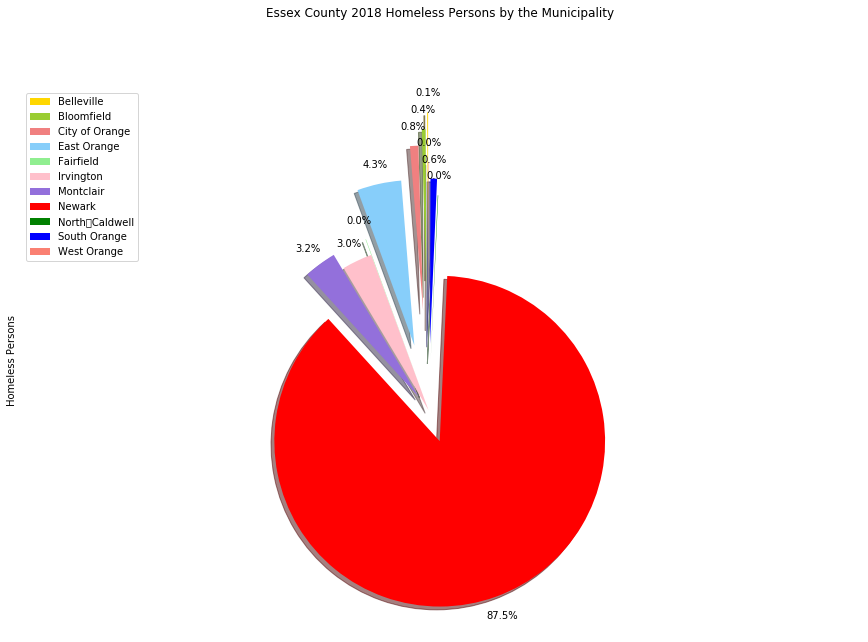

In [28]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen',
               'pink','mediumpurple','red', 'green','blue',
               'salmon']
explode_list = [0.8, 0.7, 0.6, 0.4, 0.1,
                0, 0.1, 0.2, 0.3
                , 0.4,
                0.5, ] 

df_Essex_homeless['Homeless Persons'].plot(kind='pie',
                            figsize=(15, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            pctdistance=1.12,   
                            colors=colors_list,
                            explode=explode_list
                            )

# scale the title up by 12% to match pctdistance
plt.title('Essex County 2018 Homeless Persons by the Municipality', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_Essex_homeless.index, loc='upper left') 

plt.show()

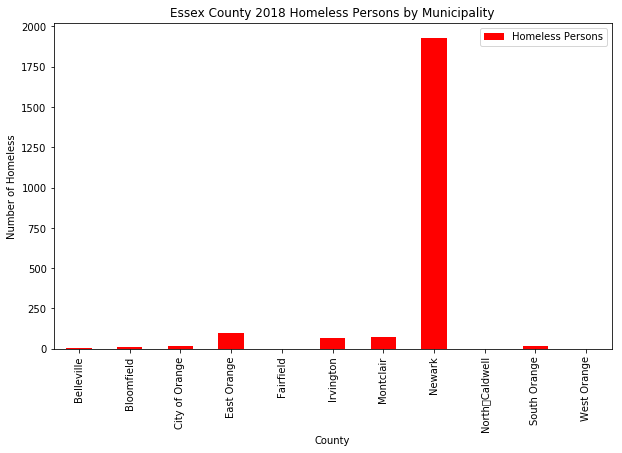

In [29]:
df_Essex_homeless.plot(kind='bar', color='red', figsize=(10, 6))

plt.xlabel('County') # add to x-label to the plot
plt.ylabel('Number of Homeless') # add y-label to the plot
plt.title('Essex County 2018 Homeless Persons by Municipality') # add title to the plot

plt.show()

### The map shows that NEWARK is the ground ZERO for homelessness with 87.5% of the Total Essex County Homeless count. In fact, it accounts for ~21% of the entire New Jersey homeless persons.

In [30]:
Municipality_homeless = df_Essex_homeless_proj.index.values
Municipality_homeless = Municipality_homeless[0].upper()
Municipality_homeless

'NEWARK'

### Get Greather New Jersey United Methodist Churches Data Location

##### The list of churches, the town they're are listed in an xls file (Church-Numbers.xlsx ), it can be downloaded from GNJUMC website. File is already downloaded in the folder.

In [31]:
download_file_cos(credentials,"Church-Numbers.xlsx","Church-Numbers.xlsx")

File Downloaded


In [32]:
GJUMC_file = pd.ExcelFile('Church-Numbers.xlsx')
df_GJUMC = GJUMC_file.parse('Sheet1')
df_GJUMC.head()

,TOWN,CHURCH NAME,CHURCH NUMBER,DISTRICT
0,DEPTFORD TWP,Almonesson UMC,1001,Gateway South
1,AUDUBON,Audubon UMC,1002,Gateway South
2,MANTUA TWP,Barnsboro UMC,1003,Gateway South
3,MANTUA TWP,Mt Zion UMC (Barnsboro),1004,Gateway South
4,BARRINGTON,First UMC (Barrington),1005,Gateway South


Determine Church name(s) in the Municipality identified that has the most homeless persons.

In [33]:
df_GJUMC_homeless = df_GJUMC[df_GJUMC['TOWN'] == Municipality_homeless]
df_GJUMC_homeless

,TOWN,CHURCH NAME,CHURCH NUMBER,DISTRICT
205,NEWARK,Franklin-St John's UMC (Newark),4043,Gateway North
206,NEWARK,St Matthew's UMC (Newark),4044,Gateway North
207,NEWARK,St Paul's Centenary UMC (Newark),4045,Gateway North
208,NEWARK,Trinity UMC (Newark),4046,Gateway North


Add address to the churches and get latitude and longitude data for each.

In [34]:
df_GJUMC_homeless.loc[:,'ADDRESS'] = ['142 Maple Ave, Newark, NJ 07112',
                                      '150 S Orange Ave, Newark, NJ 07103',
                                      '741 Mt Prospect Ave, Newark, NJ 07104',
                                      '581 Clinton Ave, Newark, NJ 07108']

df_GJUMC_homeless.loc[:,'CHURCH NAME'] = df_GJUMC_homeless['CHURCH NAME'].str.replace('Newark','').str.replace('(','').str.replace(')','').str.rstrip()
df_GJUMC_homeless

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,TOWN,CHURCH NAME,CHURCH NUMBER,DISTRICT,ADDRESS
205,NEWARK,Franklin-St John's UMC,4043,Gateway North,"142 Maple Ave, Newark, NJ 07112"
206,NEWARK,St Matthew's UMC,4044,Gateway North,"150 S Orange Ave, Newark, NJ 07103"
207,NEWARK,St Paul's Centenary UMC,4045,Gateway North,"741 Mt Prospect Ave, Newark, NJ 07104"
208,NEWARK,Trinity UMC,4046,Gateway North,"581 Clinton Ave, Newark, NJ 07108"


In [35]:
church_lat = []
church_lon = []
for town, church, address in zip(df_GJUMC_homeless['TOWN'], df_GJUMC_homeless['CHURCH NAME'], df_GJUMC_homeless['ADDRESS']) :
    address = address
    geolocator = Nominatim(user_agent=town)
    location = geolocator.geocode(address)
    latitude = location.latitude
    church_lat.append(latitude)
    longitude = location.longitude
    church_lon.append(longitude)
   # print('The geograpical coordinate of ',church,' are {}, {}.'.format(latitude, longitude))   
df_GJUMC_homeless.loc[:,'LATITUDE'] = church_lat
df_GJUMC_homeless.loc[:,'LONGITUDE'] = church_lon
df_GJUMC_homeless

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,TOWN,CHURCH NAME,CHURCH NUMBER,DISTRICT,ADDRESS,LATITUDE,LONGITUDE
205,NEWARK,Franklin-St John's UMC,4043,Gateway North,"142 Maple Ave, Newark, NJ 07112",40.705436,-74.218047
206,NEWARK,St Matthew's UMC,4044,Gateway North,"150 S Orange Ave, Newark, NJ 07103",40.737493,-74.187326
207,NEWARK,St Paul's Centenary UMC,4045,Gateway North,"741 Mt Prospect Ave, Newark, NJ 07104",40.777544,-74.164645
208,NEWARK,Trinity UMC,4046,Gateway North,"581 Clinton Ave, Newark, NJ 07108",40.722298,-74.204568


#### Create a map of NEWARK and mark the location of the churches

In [36]:
address = 'Newark, NJ'
geolocator = Nominatim(user_agent="newark_explorer")
location = geolocator.geocode(address)
Newark_lat = location.latitude
Newark_lon = location.longitude
print('The geograpical coordinate of Newark are {}, {}.'.format(Newark_lat, Newark_lon))

The geograpical coordinate of Newark are 40.735657, -74.1723667.


In [37]:
map_newark_church = folium.Map(location=[Newark_lat, Newark_lon], zoom_start=12.25)

for lat, lng, label in zip(df_GJUMC_homeless['LATITUDE'], df_GJUMC_homeless['LONGITUDE'], df_GJUMC_homeless['CHURCH NAME']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newark_church) 

locationlist = df_GJUMC_homeless[['LATITUDE','LONGITUDE']].values.tolist()
labels = df_GJUMC_homeless['CHURCH NAME'].values.tolist()


for point in range(len(locationlist)):
    popup = folium.Popup(labels[point], parse_html=True)
    folium.Marker(locationlist[point], popup=popup).add_to(map_newark_church)

map_newark_church     

#### Get Foursquare venues around NEWARK

Define helper functions to get and clean up venues.

In [38]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [39]:
def get_foursquare_data(lat,lng):
    CLIENT_ID = '2DEBGD1XUKESJVIKXLXEFYLDOKIQW3GXBRGZL4MGNKFRGY5B'
    CLIENT_SECRET = 'JIWL2X23EEHQTL0KPXWQXCGPUGFJEFECLUYNIONMAKR4POW5'
    VERSION = '20180605'
    town_latitude = lat
    town_longitude = lng
    LIMIT = 1000 # limit of number of venues returned by Foursquare API
    radius = 2000 # define radius

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        town_latitude, 
        town_longitude, 
        radius,
        LIMIT)
    results = requests.get(url).json()
    return results

In [40]:
def get_town_venues (jason_venues):
    town_venues = json_normalize(jason_venues) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.location.formattedAddress', 'venue.location.city', 'venue.categories', 'venue.location.lat', 'venue.location.lng',
                          'venue.id']
    town_venues = town_venues.loc[:, filtered_columns]

    # filter the category for each row
    town_venues['venue.categories'] = town_venues.apply(get_category_type, axis=1)

    # clean columns
    town_venues.columns = [col.split(".")[-1] for col in town_venues.columns]

    town_venues.rename(columns={'formattedAddress': 'address'}, inplace=True)
    town_venues['address'] = town_venues.address.apply(lambda x: pd.Series(x[0]))
    town_venues.columns = map(str.upper, town_venues.columns)
     
    return town_venues

In [41]:
def get_contributor(town_venues,target_venue_type):
    for idx, venue in zip(town_venues.index.values, town_venues['CATEGORIES']) :
        i = -1
        c = 0
        while i == -1 and c != len(target_venue_type) :
             if venue.find(target_venue_type[c]) != -1 :
                i = 0
                town_venues.loc[idx,'CONTRIBUTOR'] = 'Yes'
                break
             elif c == len(target_venue_type) -1 :
                town_venues.loc[idx,'CONTRIBUTOR'] = 'No'
             c += 1
    town_venues_contrib = town_venues[town_venues['CONTRIBUTOR'] == 'Yes'].reset_index(drop = True)
        
    return town_venues_contrib       

In [42]:
def agg_contributor(town_venues_contrib, similar_venue_types):
    for venue_types, venue_key in zip(similar_venue_types.values(), similar_venue_types.keys()):
        town_venues_contrib['CATEGORIES'] = town_venues_contrib.apply(lambda x: venue_key if x['CATEGORIES'] in venue_types else x['CATEGORIES'], axis=1)
    return town_venues_contrib       

##### Now get Newark venues from Foursquare

In [43]:
results_ewr = get_foursquare_data(Newark_lat,Newark_lon)

In [44]:
venues_ewr = results_ewr['response']['groups'][0]['items']
#venues_ewr

In [45]:
town_venues_ewr = get_town_venues(venues_ewr)
town_venues_ewr.head()

,NAME,ADDRESS,CITY,CATEGORIES,LAT,LNG,ID
0,Hobby's Delicatessen,32 Branford Pl (at Halsey St),Newark,Deli / Bodega,40.735048,-74.174395,4c2249077e85c9282cc6bb21
1,Fire Lounge,165 Mulberry St,Newark,Lounge,40.733834,-74.171394,4d25221ab9796dcb5c10a639
2,Blaze Pizza,"691 Broad St,",Newark,Pizza Place,40.738387,-74.170809,564d289b498ed4c6c2a4c28c
3,Prudential Center,25 Lafayette St (btwn Broad & Mulberry St),Newark,Hockey Arena,40.733608,-74.171155,49f754c1f964a520896c1fe3
4,Barnabas Health Hockey House,165 Mulberry St (at Lafayette St),Newark,Skating Rink,40.732685,-74.171708,4c562157973fc9287c5277c8


In [46]:
town_venues_ewr.shape

(100, 7)

##### Not all venues are potential contributor to the Food Bank, select venues that are categorized as 'Deli', 'Café', 'Restaurant', 'Pizza Place','BBQ', 'Donut', 'Breakfast', 'Coffee Shop', 'Sandwich Place' . Also the category types varies at times with multiple types representing same type - this needs to be aggregated to same type.

In [47]:
#### list can be added upon
target_venue_type = ['Deli', 
                     'Café',
                     'Restaurant', 
                     'Pizza Place',
                     'BBQ',
                     'Donut',
                     'Breakfast',
                     'Coffee Shop',
                     'Bakery'
                     'Sandwich Place']

#### Dictionary represent diffirent categories that needs to be aggregated to the same category type. This can be expanded.
similar_venue_types = {'Coffee Shop': ['Donut Shop', 'Breakfast Spot', 'Café', 'Bakery', 'Deli'],'Deli': ['Sandwich Place', 'Deli / Bodega']}

In [48]:
town_venue_ewr_contrib = get_contributor(town_venues_ewr, target_venue_type)
town_venue_ewr_contrib.head()

,NAME,ADDRESS,CITY,CATEGORIES,LAT,LNG,ID,CONTRIBUTOR
0,Hobby's Delicatessen,32 Branford Pl (at Halsey St),Newark,Deli / Bodega,40.735048,-74.174395,4c2249077e85c9282cc6bb21,Yes
1,Blaze Pizza,"691 Broad St,",Newark,Pizza Place,40.738387,-74.170809,564d289b498ed4c6c2a4c28c,Yes
2,Black Swan Espresso,93 Halsey Street,Newark,Coffee Shop,40.739107,-74.171974,5957e00435dfa7647d87d8ca,Yes
3,La Cocina,61 New St,Newark,Latin American Restaurant,40.740755,-74.172367,51087ab3e4b07566db03ce50,Yes
4,Dinosaur Bar-B-Que,224 Market St (at Mulberry St),Newark,BBQ Joint,40.734755,-74.170207,4f6a50ef1081b56a9458a51f,Yes


In [49]:
town_venue_ewr_contrib.shape

(55, 8)

In [50]:
town_venue_ewr_contrib.CATEGORIES.unique()

array(['Deli / Bodega', 'Pizza Place', 'Coffee Shop',
       'Latin American Restaurant', 'BBQ Joint',
       'Mediterranean Restaurant', 'Donut Shop', 'Spanish Restaurant',
       'Cuban Restaurant', 'Mexican Restaurant', 'Caribbean Restaurant',
       'Brazilian Restaurant', 'Portuguese Restaurant', 'Sushi Restaurant',
       'Halal Restaurant', 'Italian Restaurant', 'Tapas Restaurant',
       'Paella Restaurant', 'Tex-Mex Restaurant', 'Breakfast Spot', 'Café',
       'Restaurant', 'American Restaurant', 'Seafood Restaurant',
       'Korean Restaurant', 'Middle Eastern Restaurant',
       'Fast Food Restaurant'], dtype=object)

#### Map churches location and targeted venues based on Newark latitude/longtitude

In [51]:
map_newark_target_venue = map_newark_church
# add markers to map
for lat, lng, label in zip(town_venue_ewr_contrib['LAT'], town_venue_ewr_contrib['LNG'], town_venue_ewr_contrib['NAME']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newark_target_venue)  
    
map_newark_target_venue

##### The map above shows that using Newarks latitude and longitude coordinates return venues that are highly concentrated to one church only(St. Matthew's UMC). This is further compounded by the fact that Foursquare API query is limited to to 100 results. This methodology of collecting data will not return venues within the four churches vicinities.

#### Lets collect more venues aound the four GNJUMC churches in NEWARK.

In [52]:
column = ['NAME','ADDRESS','CITY','CATEGORIES','LAT','LNG','ID', 'CHURCH', 'C_LAT', 'C_LNG'] 
town_venues_ewr_church = pd.DataFrame(columns=column)
town_venues_ewr_church

,NAME,ADDRESS,CITY,CATEGORIES,LAT,LNG,ID,CHURCH,C_LAT,C_LNG


In [53]:
for lat, lng, church in zip (df_GJUMC_homeless.LATITUDE, df_GJUMC_homeless.LONGITUDE, df_GJUMC_homeless['CHURCH NAME']):
    results = get_foursquare_data(lat,lng)
    venues = results['response']['groups'][0]['items']
    #venues_ewr_church =  venues_ewr_church + venues
    venues_ewr_church = get_town_venues(venues)
    venues_ewr_church.loc[ :,'CHURCH'] = church
    venues_ewr_church.loc[ :,'C_LAT'] = lat
    venues_ewr_church.loc[ :,'C_LNG'] = lat
    town_venues_ewr_church = town_venues_ewr_church.append(venues_ewr_church)

town_venues_ewr_church = town_venues_ewr_church.reset_index(drop=True)
town_venues_ewr_church.head()

,NAME,ADDRESS,CITY,CATEGORIES,LAT,LNG,ID,CHURCH,C_LAT,C_LNG
0,King's Family Restaurant,327 Lyons Ave,Newark,Southern / Soul Food Restaurant,40.712413,-74.218146,4e4c9d01bd413c4cc66abac9,Franklin-St John's UMC,40.705436,40.705436
1,Long Ave BBQ,166 Long Ave,Hillside,BBQ Joint,40.696187,-74.227228,4b992137f964a520616335e3,Franklin-St John's UMC,40.705436,40.705436
2,SuperFresh Supermarket,471 Lyons Ave,Irvington,Grocery Store,40.716162,-74.223357,576c8bafcd109214748d89dd,Franklin-St John's UMC,40.705436,40.705436
3,Weequahic Park,Weequahic Park Dr,Newark,Park,40.703155,-74.199429,4bd227559854d13a6617fb4d,Franklin-St John's UMC,40.705436,40.705436
4,Oasis,Liberty Ave (Millard ave),Hillside,Café,40.696369,-74.233993,4b617c36f964a52035152ae3,Franklin-St John's UMC,40.705436,40.705436


In [54]:
town_venues_ewr_church.shape

(367, 10)

In [55]:
ewr_church_contrib = get_contributor(town_venues_ewr_church,target_venue_type)
ewr_church_contrib = agg_contributor(ewr_church_contrib,similar_venue_types)
##### Since were getting venues with 2000 meters from each church, we might run into overalapping venues.
##### We need to drop duplicate venue ids and lets drop venues that are not located in NEWARK.
ewr_church_contrib.drop_duplicates(subset=['ID'], keep='first')
ewr_church_contrib = ewr_church_contrib[ewr_church_contrib['CITY'] == 'Newark'].reset_index(drop = True)
ewr_church_contrib.head()

,NAME,ADDRESS,CITY,CATEGORIES,LAT,LNG,ID,CHURCH,C_LAT,C_LNG,CONTRIBUTOR
0,King's Family Restaurant,327 Lyons Ave,Newark,Southern / Soul Food Restaurant,40.712413,-74.218146,4e4c9d01bd413c4cc66abac9,Franklin-St John's UMC,40.705436,40.705436,Yes
1,Bragman's Deli,393 Hawthorne Ave,Newark,Coffee Shop,40.718150,-74.209896,4b8f090cf964a520ca4533e3,Franklin-St John's UMC,40.705436,40.705436,Yes
2,Wendy's,462 Chancellor Ave,Newark,Fast Food Restaurant,40.712014,-74.226921,4bfec510e584c9286f356d25,Franklin-St John's UMC,40.705436,40.705436,Yes
3,Dunkin',"10 Toler Pl, NEC Train Station (E Runyon St)",Newark,Coffee Shop,40.709346,-74.199340,4d556767ba5b224b7f1f0e14,Franklin-St John's UMC,40.705436,40.705436,Yes
4,Dunkin',257 Lyons Ave #259,Newark,Coffee Shop,40.711178,-74.215802,4bc9fce70687ef3b63f4dacc,Franklin-St John's UMC,40.705436,40.705436,Yes


In [56]:
ewr_church_contrib.shape


(105, 11)

In [57]:
#### write to output to xls file
ewr_church_contrib.to_excel('ewr_church_contrib.xlsx')

In [58]:
map_newark_church = folium.Map(location=[Newark_lat, Newark_lon], zoom_start=12.25)

for lat, lng, label in zip(df_GJUMC_homeless['LATITUDE'], df_GJUMC_homeless['LONGITUDE'], df_GJUMC_homeless['CHURCH NAME']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newark_church) 

locationlist = df_GJUMC_homeless[['LATITUDE','LONGITUDE']].values.tolist()
labels = df_GJUMC_homeless['CHURCH NAME'].values.tolist()


for point in range(len(locationlist)):
    popup = folium.Popup(labels[point], parse_html=True)
    folium.Marker(locationlist[point], popup=popup).add_to(map_newark_church)

for lat, lng, label in zip(ewr_church_contrib['LAT'], ewr_church_contrib['LNG'], ewr_church_contrib['NAME']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        fill=True,
        color = 'red',
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newark_church) 
    
map_newark_church

##### The map shows the 105 food venues that are potential contributor to the Food Bank.

#### Cluster the targeted venues

In [59]:
ewr_onehot = pd.get_dummies(ewr_church_contrib[['CATEGORIES']], prefix="", prefix_sep="")
ewr_onehot['CHURCH'] = ewr_church_contrib['CHURCH'] 
fixed_columns = [ewr_onehot.columns[-1]] + list(ewr_onehot.columns[:-1])
ewr_onehot = ewr_onehot[fixed_columns]
ewr_onehot.head()

,CHURCH,American Restaurant,BBQ Joint,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Cuban Restaurant,Fast Food Restaurant,Halal Restaurant,Italian Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Paella Restaurant,Pizza Place,Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Tex-Mex Restaurant
0,Franklin-St John's UMC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Franklin-St John's UMC,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Franklin-St John's UMC,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Franklin-St John's UMC,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Franklin-St John's UMC,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Define helper functions to  get cluster and map cluster.

In [60]:
def cluster (k, df_preK, df_preK_onehot):
   # kclusters = k
    df_postK = df_preK.copy()
    grouped_clustering = df_preK_onehot.drop('CHURCH', 1)

    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(grouped_clustering)

    # check cluster labels generated for each row in the dataframe
    kmeans.labels_[0:-1] 
    
    df_postK.insert(0, 'CLUSTER', kmeans.labels_)
    df_clustered_K = df_postK
    #kclusters = 0
    return df_clustered_K

In [61]:
def map_cluster(k, df):
    map_cluster = map_newark_church
    # set color scheme for the clusters
    x = np.arange(k)
    ys = [i + x + (i*x)**2 for i in range(k)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
    markers_colors = []
    for lat, lon, poi, cluster in zip(df['LAT'], df['LNG'], df['CHURCH'], df['CLUSTER']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_cluster)

    return map_cluster

#### Try different k values, staring with 4 (4 being GNJUMC churches in NEWARK)

##### k = 4

In [62]:
ewr_church_contrib_k4 = cluster(4,ewr_church_contrib, ewr_onehot)
ewr_church_contrib_k4.sort_values(by='CLUSTER')

,CLUSTER,NAME,ADDRESS,CITY,CATEGORIES,LAT,LNG,ID,CHURCH,C_LAT,C_LNG,CONTRIBUTOR
0,0,King's Family Restaurant,327 Lyons Ave,Newark,Southern / Soul Food Restaurant,40.712413,-74.218146,4e4c9d01bd413c4cc66abac9,Franklin-St John's UMC,40.705436,40.705436,Yes
36,0,McWhorter Barbeque,104 McWhorter St (at Green St),Newark,BBQ Joint,40.729685,-74.166817,4b99212af964a5205b6335e3,St Matthew's UMC,40.737493,40.737493,Yes
38,0,Golden Krust Caribbean Bakery and Grill,197 Market St (at Broad St.),Newark,Caribbean Restaurant,40.735231,-74.170929,4be23b551dd22d7f47cb93bd,St Matthew's UMC,40.737493,40.737493,Yes
41,0,Chipotle Mexican Grill,222 Market St (Market & Mulberry),Newark,Mexican Restaurant,40.734760,-74.170347,537397b7498e25412ed07be6,St Matthew's UMC,40.737493,40.737493,Yes
43,0,Francessca's,"Newark, NJ 07102",Newark,Italian Restaurant,40.730926,-74.165271,4fd2a982e4b034e1f9b8eb4c,St Matthew's UMC,40.737493,40.737493,Yes
44,0,Don Pepe Restaurant,844 McCarter Hwy,Newark,Spanish Restaurant,40.736613,-74.165564,4b5df893f964a520c67629e3,St Matthew's UMC,40.737493,40.737493,Yes
45,0,Spanish Tavern,103 McWhorter St (at Green St),Newark,Paella Restaurant,40.729684,-74.166907,4bbbb4642d9ea59395c39fce,St Matthew's UMC,40.737493,40.737493,Yes
46,0,27 Mix,27 Halsey St (Central Ave),Newark,American Restaurant,40.741606,-74.171136,4addeea8f964a520696621e3,St Matthew's UMC,40.737493,40.737493,Yes
47,0,Harvest Table,127 Halsey St (Raymond Blvd),Newark,American Restaurant,40.738105,-74.172555,4ae1e1b6f964a5204f8821e3,St Matthew's UMC,40.737493,40.737493,Yes
49,0,Nico,1 Center St (Mulberry St),Newark,Italian Restaurant,40.739550,-74.167182,4f4863dae4b0b0b99a1b7854,St Matthew's UMC,40.737493,40.737493,Yes


In [63]:
ewr_church_contrib_k4.shape

(105, 12)

In [64]:
map_cluster(4,ewr_church_contrib_k4)


#### with k = 4 Cluster 0 is mixed of different restaurant venues and Deli venues.

#### Try k = 5

In [65]:
ewr_church_contrib_k5 = cluster(5, ewr_church_contrib, ewr_onehot)
ewr_church_contrib_k5.sort_values(by='CLUSTER')

,CLUSTER,NAME,ADDRESS,CITY,CATEGORIES,LAT,LNG,ID,CHURCH,C_LAT,C_LNG,CONTRIBUTOR
0,0,King's Family Restaurant,327 Lyons Ave,Newark,Southern / Soul Food Restaurant,40.712413,-74.218146,4e4c9d01bd413c4cc66abac9,Franklin-St John's UMC,40.705436,40.705436,Yes
31,0,Dario's Restaurant,20 Academy St,Newark,Mexican Restaurant,40.737399,-74.172631,4bd0801ccaff9521b8eccef0,St Matthew's UMC,40.737493,40.737493,Yes
34,0,Qdoba Mexican Grill,64 Halsey St,Newark,Tex-Mex Restaurant,40.740086,-74.171226,56f160d2cd10009898b14957,St Matthew's UMC,40.737493,40.737493,Yes
36,0,McWhorter Barbeque,104 McWhorter St (at Green St),Newark,BBQ Joint,40.729685,-74.166817,4b99212af964a5205b6335e3,St Matthew's UMC,40.737493,40.737493,Yes
38,0,Golden Krust Caribbean Bakery and Grill,197 Market St (at Broad St.),Newark,Caribbean Restaurant,40.735231,-74.170929,4be23b551dd22d7f47cb93bd,St Matthew's UMC,40.737493,40.737493,Yes
41,0,Chipotle Mexican Grill,222 Market St (Market & Mulberry),Newark,Mexican Restaurant,40.734760,-74.170347,537397b7498e25412ed07be6,St Matthew's UMC,40.737493,40.737493,Yes
44,0,Don Pepe Restaurant,844 McCarter Hwy,Newark,Spanish Restaurant,40.736613,-74.165564,4b5df893f964a520c67629e3,St Matthew's UMC,40.737493,40.737493,Yes
45,0,Spanish Tavern,103 McWhorter St (at Green St),Newark,Paella Restaurant,40.729684,-74.166907,4bbbb4642d9ea59395c39fce,St Matthew's UMC,40.737493,40.737493,Yes
46,0,27 Mix,27 Halsey St (Central Ave),Newark,American Restaurant,40.741606,-74.171136,4addeea8f964a520696621e3,St Matthew's UMC,40.737493,40.737493,Yes
47,0,Harvest Table,127 Halsey St (Raymond Blvd),Newark,American Restaurant,40.738105,-74.172555,4ae1e1b6f964a5204f8821e3,St Matthew's UMC,40.737493,40.737493,Yes


In [66]:
map_cluster(5,ewr_church_contrib_k5)

#### with k = 5 Cluster 0 is mixed of different restaurant venues and Deli venues is now into a  separate Cluster(Cluster 4). k = 5 is a much better than k = 5.

##### Try k = 6

In [67]:
ewr_church_contrib_k6 = cluster(6, ewr_church_contrib, ewr_onehot)
ewr_church_contrib_k6.sort_values(by='CLUSTER')

,CLUSTER,NAME,ADDRESS,CITY,CATEGORIES,LAT,LNG,ID,CHURCH,C_LAT,C_LNG,CONTRIBUTOR
67,0,Spanish Manor Restaurant,246 Heller Pkwy,Newark,Paella Restaurant,40.778239,-74.175929,4c216a1f502b9521e2c16d21,St Paul's Centenary UMC,40.777544,40.777544,Yes
66,0,Bloomfield Avenue B.B.Q.,391 Bloomfield Ave,Newark,Brazilian Restaurant,40.768823,-74.182088,4cc9b77f41e75481e4315e84,St Paul's Centenary UMC,40.777544,40.777544,Yes
102,0,Bergen Seafood,1071 Bergen St (Lyons Ave),Newark,Seafood Restaurant,40.707654,-74.208621,4bf6f073508c0f479a143d31,Trinity UMC,40.722298,40.722298,Yes
25,0,Nizi Sushi,28 Central Ave (Halsey St),Newark,Sushi Restaurant,40.741764,-74.170426,5046de90e4b0fb338101b1a8,St Matthew's UMC,40.737493,40.737493,Yes
62,0,Omar's Café,646 Mount Prospect Ave,Newark,Cuban Restaurant,40.774208,-74.166594,4c8a4b1e52a98cfaa61f2be9,St Paul's Centenary UMC,40.777544,40.777544,Yes
61,0,Ambassadors Fish & Chicken,362 S Orange Ave,Newark,Restaurant,40.740839,-74.202087,4ce702e7fe90a35d448e390e,St Matthew's UMC,40.737493,40.737493,Yes
29,0,The Halal Guys,72 Halsey St,Newark,Halal Restaurant,40.739848,-74.171333,578d6db4498e01b85bf9e759,St Matthew's UMC,40.737493,40.737493,Yes
30,0,Delicias De Minas Restaurante,168 McWhorter St,Newark,Brazilian Restaurant,40.726899,-74.168288,4c4a30af959220a13978c30d,St Matthew's UMC,40.737493,40.737493,Yes
31,0,Dario's Restaurant,20 Academy St,Newark,Mexican Restaurant,40.737399,-74.172631,4bd0801ccaff9521b8eccef0,St Matthew's UMC,40.737493,40.737493,Yes
44,0,Don Pepe Restaurant,844 McCarter Hwy,Newark,Spanish Restaurant,40.736613,-74.165564,4b5df893f964a520c67629e3,St Matthew's UMC,40.737493,40.737493,Yes


In [68]:
map_cluster(6,ewr_church_contrib_k6)

#### with k = 6,  American restaurant venue is cLustered on its own (Cluster 6). It should be clustered with the other restaurants as well. Hence k = 5 is still much better than k =6.

#### The best k value is 5. Examine the CLUSTER

##### Cluster 0

In [69]:
ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CLUSTER'] == 0, ewr_church_contrib_k5.columns[[1,2,3,4,8]]]

,NAME,ADDRESS,CITY,CATEGORIES,CHURCH
0,King's Family Restaurant,327 Lyons Ave,Newark,Southern / Soul Food Restaurant,Franklin-St John's UMC
6,Golden Krust Caribbean Bakery and Grill,467 Lyons Ave,Newark,Caribbean Restaurant,Franklin-St John's UMC
8,Amin's Fongyip Chinese Muslim,430 Chancellor Ave,Newark,Chinese Restaurant,Franklin-St John's UMC
10,La Cocina,61 New St,Newark,Latin American Restaurant,St Matthew's UMC
14,Green Chicpea,59 Halsey St,Newark,Mediterranean Restaurant,St Matthew's UMC
15,Steak and take food truck,"Newark, NJ 07103",Newark,Seafood Restaurant,St Matthew's UMC
17,Chateau of Spain,11 Franklin St,Newark,Spanish Restaurant,St Matthew's UMC
18,Mi Gente Cafe,7 Central Ave (Broad St),Newark,Cuban Restaurant,St Matthew's UMC
21,Dinosaur Bar-B-Que,224 Market St (at Mulberry St),Newark,BBQ Joint,St Matthew's UMC
24,Vonda's Kitchen,183 W Kinney St,Newark,American Restaurant,St Matthew's UMC


##### Cluster 1

In [70]:
ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CLUSTER'] == 1, ewr_church_contrib_k5.columns[[1,2,3,4,8]]]

,NAME,ADDRESS,CITY,CATEGORIES,CHURCH
5,Domino's Pizza,1003 Bergen St,Newark,Pizza Place,Franklin-St John's UMC
13,Blaze Pizza,"691 Broad St,",Newark,Pizza Place,St Matthew's UMC
20,Robert's Pizzeria,63 New St (Washington Street),Newark,Pizza Place,St Matthew's UMC
28,Queen Pizza,114 Halsey St,Newark,Pizza Place,St Matthew's UMC
40,"Giovanni Pizza, Pasta & Grill",191 Central Ave,Newark,Pizza Place,St Matthew's UMC
42,Pronto,48 Academy St,Newark,Pizza Place,St Matthew's UMC
52,Mercato Tomato Pie,212 Market St,Newark,Pizza Place,St Matthew's UMC
56,Pizza Hut,250 Central Ave.,Newark,Pizza Place,St Matthew's UMC
65,Gencarelli's Bar & Grill,501 Bloomfield Ave (btwn N 10th & N 11th St.),Newark,Pizza Place,St Paul's Centenary UMC
73,Domino's Pizza,551 Bloomfield Ave,Newark,Pizza Place,St Paul's Centenary UMC


##### Cluster 2

In [71]:
ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CLUSTER'] == 2, ewr_church_contrib_k5.columns[[1,2,3,4,8]]]

,NAME,ADDRESS,CITY,CATEGORIES,CHURCH
1,Bragman's Deli,393 Hawthorne Ave,Newark,Coffee Shop,Franklin-St John's UMC
3,Dunkin',"10 Toler Pl, NEC Train Station (E Runyon St)",Newark,Coffee Shop,Franklin-St John's UMC
4,Dunkin',257 Lyons Ave #259,Newark,Coffee Shop,Franklin-St John's UMC
9,Hobby's Delicatessen,32 Branford Pl (at Halsey St),Newark,Coffee Shop,St Matthew's UMC
11,Black Swan Espresso,93 Halsey Street,Newark,Coffee Shop,St Matthew's UMC
12,Dunkin',"311 Springfield Ave, #313 (at Hunterdon St)",Newark,Coffee Shop,St Matthew's UMC
16,Halsey Deli,147 Halsey St (Acadamey Street),Newark,Coffee Shop,St Matthew's UMC
19,Nubian Family Flavor,410 Springfield Ave,Newark,Coffee Shop,St Matthew's UMC
22,Intrinsic Cafe,5 Sussex Ave (Central Ave),Newark,Coffee Shop,St Matthew's UMC
23,Dunkin',150 Halsey St (Academy),Newark,Coffee Shop,St Matthew's UMC


##### Cluster 3

In [72]:
ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CLUSTER'] == 3, ewr_church_contrib_k5.columns[[1,2,3,4,8]]]

,NAME,ADDRESS,CITY,CATEGORIES,CHURCH
2,Wendy's,462 Chancellor Ave,Newark,Fast Food Restaurant,Franklin-St John's UMC
7,McDonald's,872 Frelinghuysen Ave,Newark,Fast Food Restaurant,Franklin-St John's UMC
27,Ambassador Fish and Chicken,139 Clinton Ave,Newark,Fast Food Restaurant,St Matthew's UMC
37,Wendy's,427 Springfield Avenue,Newark,Fast Food Restaurant,St Matthew's UMC
63,White Castle,642-654 Broadway,Newark,Fast Food Restaurant,St Paul's Centenary UMC
76,McDonald's,621 Broadway,Newark,Fast Food Restaurant,St Paul's Centenary UMC
81,White Castle,307 Elizabeth Ave,Newark,Fast Food Restaurant,Trinity UMC
82,Wendy's,427 Springfield Avenue,Newark,Fast Food Restaurant,Trinity UMC
83,Ambassador Fish and Chicken,139 Clinton Ave,Newark,Fast Food Restaurant,Trinity UMC
88,Burger King & Popeyes,Elizabeth Place (East Peddie St),Newark,Fast Food Restaurant,Trinity UMC


##### Cluster 4

In [73]:
ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CLUSTER'] == 4, ewr_church_contrib_k5.columns[[1,2,3,4,8]]]

,NAME,ADDRESS,CITY,CATEGORIES,CHURCH
43,Francessca's,"Newark, NJ 07102",Newark,Italian Restaurant,St Matthew's UMC
49,Nico,1 Center St (Mulberry St),Newark,Italian Restaurant,St Matthew's UMC
51,Mulberry Restaurant and Pizzeria,258 Mulberry St (at Elm St),Newark,Italian Restaurant,St Matthew's UMC
71,Luigi's Restaurant,561 Bloomfield Ave,Newark,Italian Restaurant,St Paul's Centenary UMC


#### With the clustering, the four churches can all together collect food according to category types (cluster types) and store foods from each cluster. Or each church can collect food with their neighborhood according to the cluster value 

#### Venues Clustered around Franklin-St John\'s UMC'

In [74]:
Franklin_St_John_UMC_venue = ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CHURCH'] == 'Franklin-St John\'s UMC', ewr_church_contrib_k5.columns[[0,1,2,3,4,8]]].sort_values(by = 'CLUSTER')
Franklin_St_John_UMC_venue

,CLUSTER,NAME,ADDRESS,CITY,CATEGORIES,CHURCH
0,0,King's Family Restaurant,327 Lyons Ave,Newark,Southern / Soul Food Restaurant,Franklin-St John's UMC
6,0,Golden Krust Caribbean Bakery and Grill,467 Lyons Ave,Newark,Caribbean Restaurant,Franklin-St John's UMC
8,0,Amin's Fongyip Chinese Muslim,430 Chancellor Ave,Newark,Chinese Restaurant,Franklin-St John's UMC
5,1,Domino's Pizza,1003 Bergen St,Newark,Pizza Place,Franklin-St John's UMC
1,2,Bragman's Deli,393 Hawthorne Ave,Newark,Coffee Shop,Franklin-St John's UMC
3,2,Dunkin',"10 Toler Pl, NEC Train Station (E Runyon St)",Newark,Coffee Shop,Franklin-St John's UMC
4,2,Dunkin',257 Lyons Ave #259,Newark,Coffee Shop,Franklin-St John's UMC
2,3,Wendy's,462 Chancellor Ave,Newark,Fast Food Restaurant,Franklin-St John's UMC
7,3,McDonald's,872 Frelinghuysen Ave,Newark,Fast Food Restaurant,Franklin-St John's UMC


In [75]:
Franklin_St_John_UMC_venue.shape

(9, 6)

#### Venues Clustered around 'St Matthew\'s UMC'

In [76]:
St_Matthew_UMC_venue = ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CHURCH'] == 'St Matthew\'s UMC', ewr_church_contrib_k5.columns[[0,1,2,3,4,8]]].sort_values(by = 'CLUSTER')
St_Matthew_UMC_venue

,CLUSTER,NAME,ADDRESS,CITY,CATEGORIES,CHURCH
61,0,Ambassadors Fish & Chicken,362 S Orange Ave,Newark,Restaurant,St Matthew's UMC
41,0,Chipotle Mexican Grill,222 Market St (Market & Mulberry),Newark,Mexican Restaurant,St Matthew's UMC
46,0,27 Mix,27 Halsey St (Central Ave),Newark,American Restaurant,St Matthew's UMC
38,0,Golden Krust Caribbean Bakery and Grill,197 Market St (at Broad St.),Newark,Caribbean Restaurant,St Matthew's UMC
47,0,Harvest Table,127 Halsey St (Raymond Blvd),Newark,American Restaurant,St Matthew's UMC
36,0,McWhorter Barbeque,104 McWhorter St (at Green St),Newark,BBQ Joint,St Matthew's UMC
60,0,Turkish Pita Place,150 Halsey St,Newark,Middle Eastern Restaurant,St Matthew's UMC
34,0,Qdoba Mexican Grill,64 Halsey St,Newark,Tex-Mex Restaurant,St Matthew's UMC
31,0,Dario's Restaurant,20 Academy St,Newark,Mexican Restaurant,St Matthew's UMC
30,0,Delicias De Minas Restaurante,168 McWhorter St,Newark,Brazilian Restaurant,St Matthew's UMC


In [77]:
St_Matthew_UMC_venue.shape

(53, 6)

#### Venues Clustered around 'St Paul's Centenary UMC'

In [78]:
St_Paul_Centenary_UMC = ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CHURCH'] == 'St Paul\'s Centenary UMC', ewr_church_contrib_k5.columns[[0,1,2,3,4,8]]].sort_values(by = 'CLUSTER')
St_Paul_Centenary_UMC

,CLUSTER,NAME,ADDRESS,CITY,CATEGORIES,CHURCH
62,0,Omar's Café,646 Mount Prospect Ave,Newark,Cuban Restaurant,St Paul's Centenary UMC
66,0,Bloomfield Avenue B.B.Q.,391 Bloomfield Ave,Newark,Brazilian Restaurant,St Paul's Centenary UMC
67,0,Spanish Manor Restaurant,246 Heller Pkwy,Newark,Paella Restaurant,St Paul's Centenary UMC
68,0,Taino's Kitchen,849 Mount Prospect Ave,Newark,Spanish Restaurant,St Paul's Centenary UMC
69,0,Stephanie's BBQ IV,687 N 6th St (at Davenport Ave.),Newark,BBQ Joint,St Paul's Centenary UMC
65,1,Gencarelli's Bar & Grill,501 Bloomfield Ave (btwn N 10th & N 11th St.),Newark,Pizza Place,St Paul's Centenary UMC
73,1,Domino's Pizza,551 Bloomfield Ave,Newark,Pizza Place,St Paul's Centenary UMC
74,1,Papa John's Pizza,451 Bloomfield Ave (Bloomfield Ave),Newark,Pizza Place,St Paul's Centenary UMC
75,1,Pizza Hut,487 Bloomfield Ave.,Newark,Pizza Place,St Paul's Centenary UMC
64,2,Dunkin',746 Broadway #756,Newark,Coffee Shop,St Paul's Centenary UMC


In [80]:
St_Paul_Centenary_UMC.shape

(15, 6)

#### Venues Clustered around 'Trinity UMC'

In [81]:
Trinity_UMC_venue = ewr_church_contrib_k5.loc[ewr_church_contrib_k5['CHURCH'] == 'Trinity UMC', ewr_church_contrib_k5.columns[[0,1,2,3,4,8]]].sort_values(by = 'CLUSTER')
Trinity_UMC_venue

,CLUSTER,NAME,ADDRESS,CITY,CATEGORIES,CHURCH
77,0,Kings Restaurant,557 Clinton Ave,Newark,Restaurant,Trinity UMC
102,0,Bergen Seafood,1071 Bergen St (Lyons Ave),Newark,Seafood Restaurant,Trinity UMC
97,0,Golden Krust Caribbean Bakery and Grill,467 Lyons Ave,Newark,Caribbean Restaurant,Trinity UMC
103,0,CPG Truck Company,"Newark, NJ 07102",Newark,Sushi Restaurant,Trinity UMC
86,0,Qdoba Mexican Grill,10 Toler Pl (Space A6G - Terminal A),Newark,Mexican Restaurant,Trinity UMC
85,0,Vonda's Kitchen,183 W Kinney St,Newark,American Restaurant,Trinity UMC
104,0,"NA""JAYYAH","Newark, NJ",Newark,American Restaurant,Trinity UMC
80,0,King's Family Restaurant,327 Lyons Ave,Newark,Southern / Soul Food Restaurant,Trinity UMC
93,1,Domino's Pizza,1003 Bergen St,Newark,Pizza Place,Trinity UMC
84,2,Dunkin',"311 Springfield Ave, #313 (at Hunterdon St)",Newark,Coffee Shop,Trinity UMC


In [82]:
Trinity_UMC_venue.shape

(28, 6)

### With four Food Banks (located on each church) the GNJUMC district can charge the four churches to all together collect foods according to the category types (cluster types), they can divide the collected foods according to their needs. Or each church can collect food from their neighborhood venues according to the cluster value to and ran their own food bank.

##### Download venues with k = 5 to xls file 

In [83]:
ewr_church_contrib_k5.sort_values(by='CLUSTER').to_excel('ewr_church_contrib_k5.xlsx')